In [1]:
#导入表格数据
import pandas as pd
df=pd.read_excel('C:\\Users\\hp\\Desktop\\keshe\\material embedding.xlsx')

In [2]:
df['first_product'] = df['first_product'].replace('C2H4', 'C₂H₄')
df['first_product'] = df['first_product'].replace('C2H5OH', 'C₂H₅OH')
df['first_product'] = df['first_product'].replace('CH3COOH', 'CH₃COOH')
df['first_product'] = df['first_product'].replace('CH3OH', 'CH₃OH')
df['first_product'] = df['first_product'].replace('CH4', 'CH₄')
df['first_product'] = df['first_product'].replace('H2C2O4', 'H₂C₂O₄')

In [3]:
from sklearn.preprocessing import LabelEncoder
# 进行标签编码
le = LabelEncoder()
df['First product'] = le.fit_transform(df['first_product'])
df['MEA configuration'] = le.fit_transform(df['MEA_configuration'])
df['Electrolyte'] = le.fit_transform(df['electrolyte_2'])
df['Membrane'] = le.fit_transform(df['membrane'])
df['Anode'] = le.fit_transform(df['anode'])
#改名
df.rename(columns={'voltage': 'Voltage'}, inplace=True)
df.rename(columns={'electrolyte_flow_anolyte_rate': 'Electrolyte flow rate'}, inplace=True)
df.rename(columns={'CO2_flow_rate': 'CO₂ flow rate'}, inplace=True)
df.rename(columns={'MEA_area': 'MEA area'}, inplace=True)
df.rename(columns={'membrane_area': 'Membrane area'}, inplace=True)
df.rename(columns={'anode_area': 'Anode area'}, inplace=True)
df.rename(columns={'anode_catalyst_loading': 'Anode catalyst loading'}, inplace=True)
df.rename(columns={'cathode_area': 'Cathode area'}, inplace=True)
df.rename(columns={'cathode_catalyst_loading': 'Cathode catalyst loading'}, inplace=True)
df.rename(columns={'temperature': 'Temperature'}, inplace=True)
df.rename(columns={'electrolyte_1': 'Electrolyte concentration'}, inplace=True)
df.rename(columns={'copper_containing': 'Copper containing'}, inplace=True)

编码值: 0 对应原始值: CH₃COOH
编码值: 1 对应原始值: CH₃OH
编码值: 2 对应原始值: CH₄
编码值: 3 对应原始值: CO
编码值: 4 对应原始值: C₂H₄
编码值: 5 对应原始值: C₂H₅OH
编码值: 6 对应原始值: HCOOH
编码值: 7 对应原始值: H₂C₂O₄
Average Accuracy on KFold: 0.8997402597402597
Average Precision on KFold: 0.9096607297011046
Average Recall on KFold: 0.8997402597402597
Average F1 Score on KFold: 0.8920270036592957


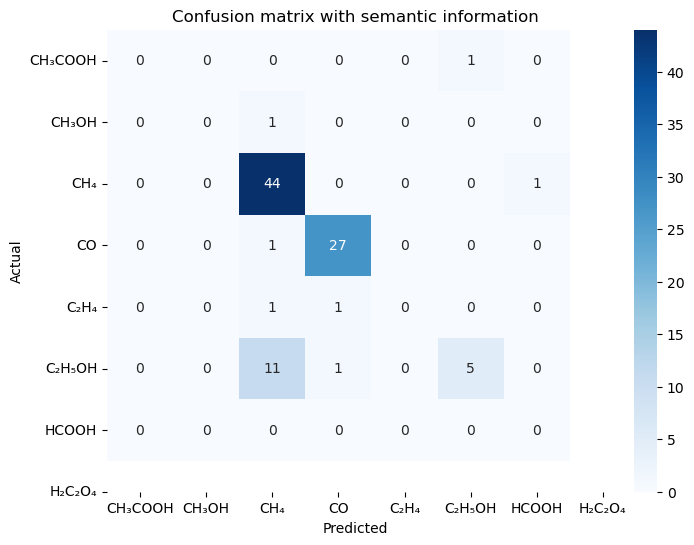

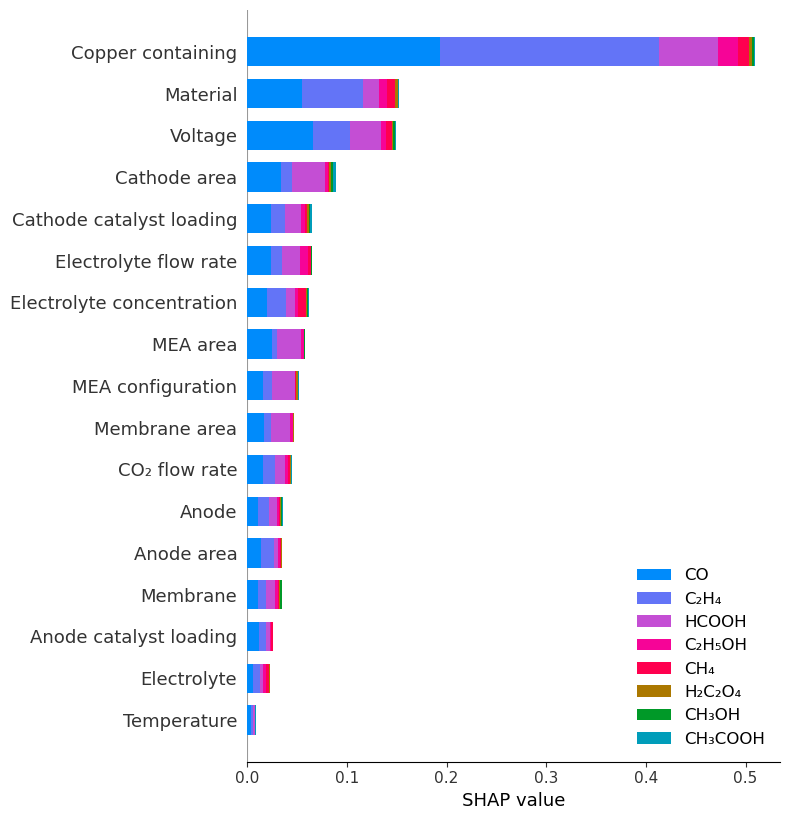

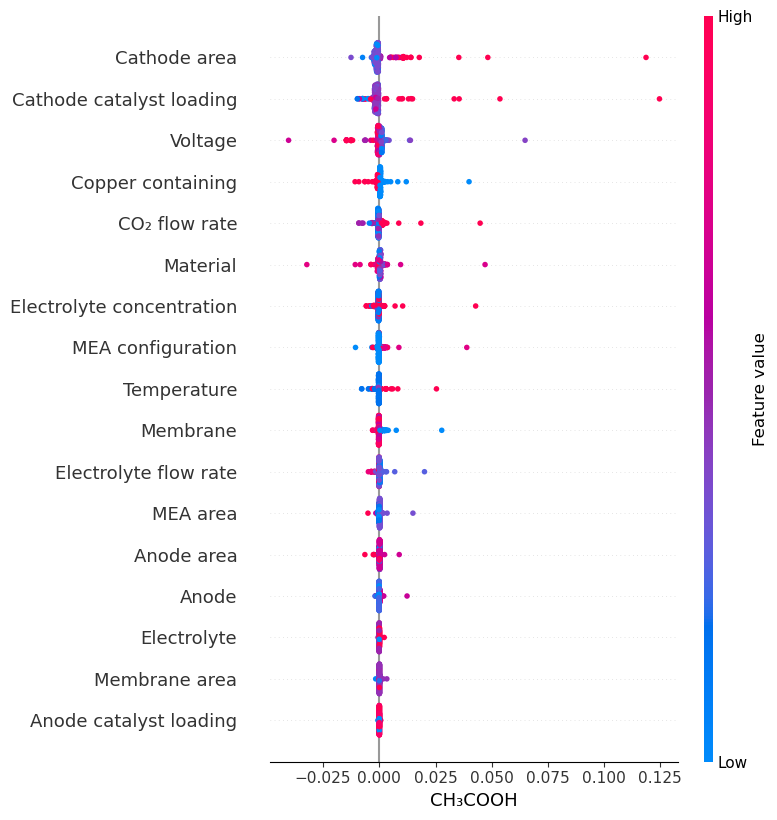

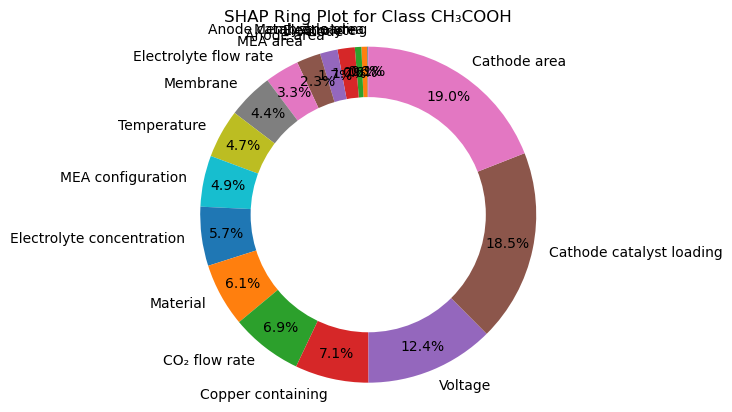

Table of percentage values for Class CH₃COOH saved as CH₃COOH.csv


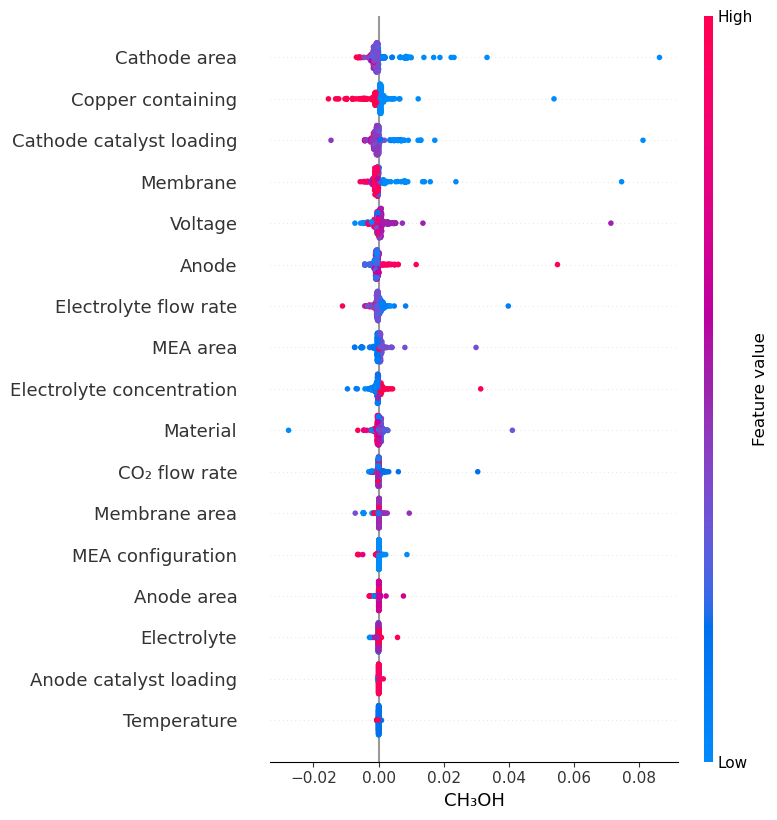

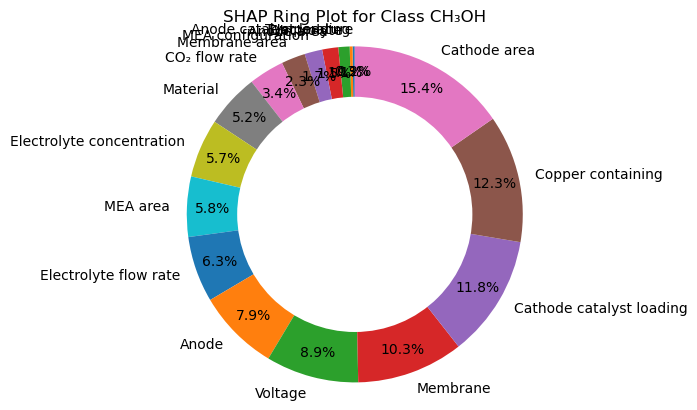

Table of percentage values for Class CH₃OH saved as CH₃OH.csv


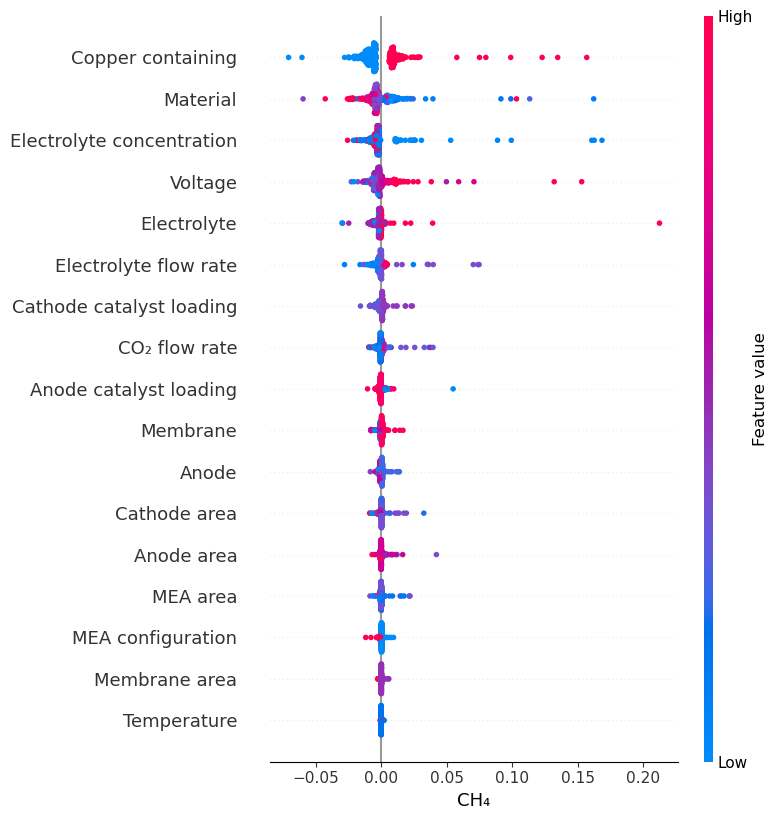

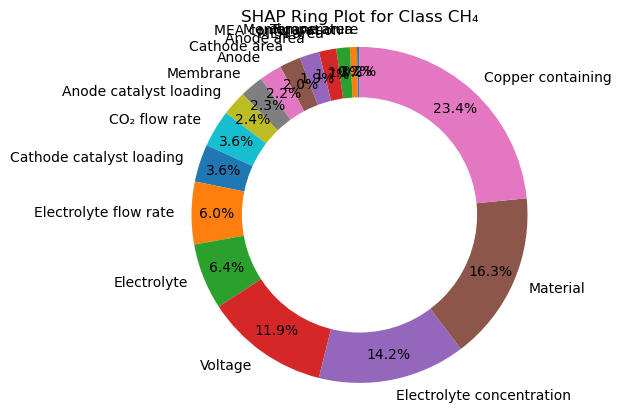

Table of percentage values for Class CH₄ saved as CH₄.csv


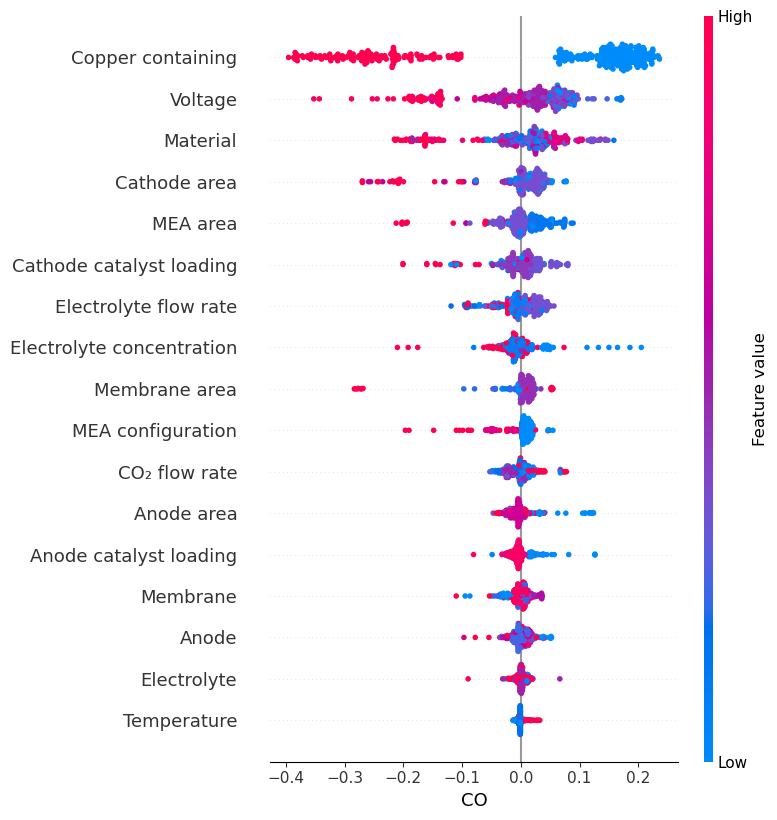

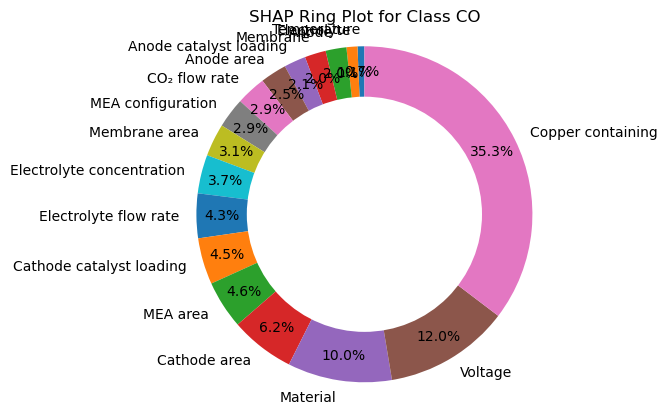

Table of percentage values for Class CO saved as CO.csv


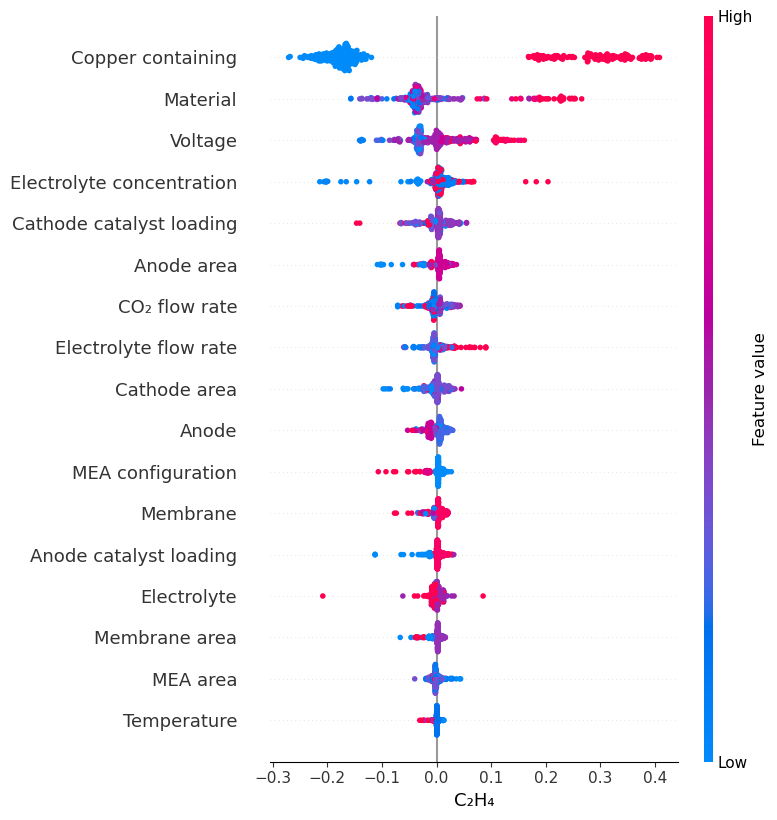

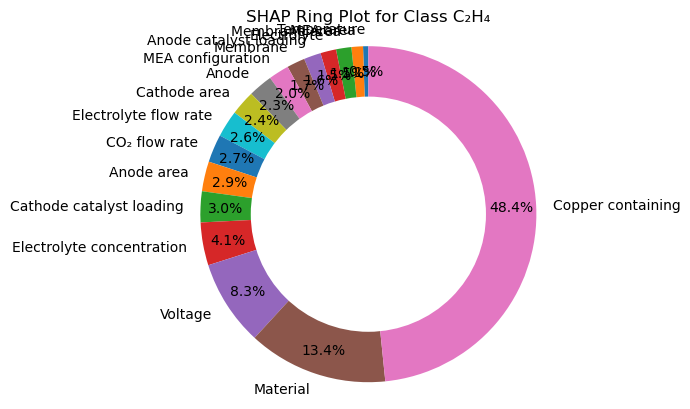

Table of percentage values for Class C₂H₄ saved as C₂H₄.csv


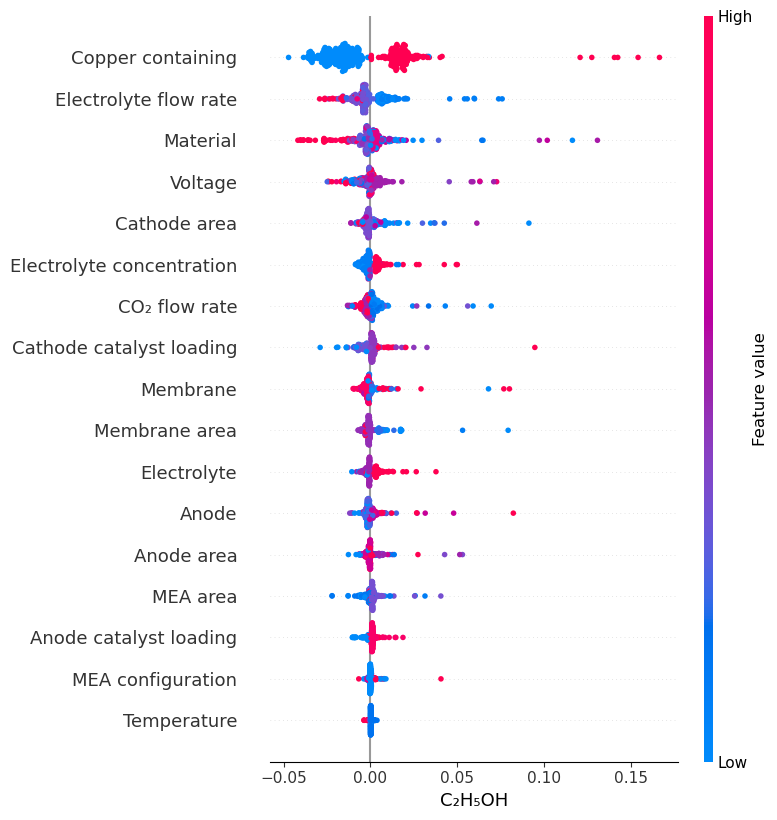

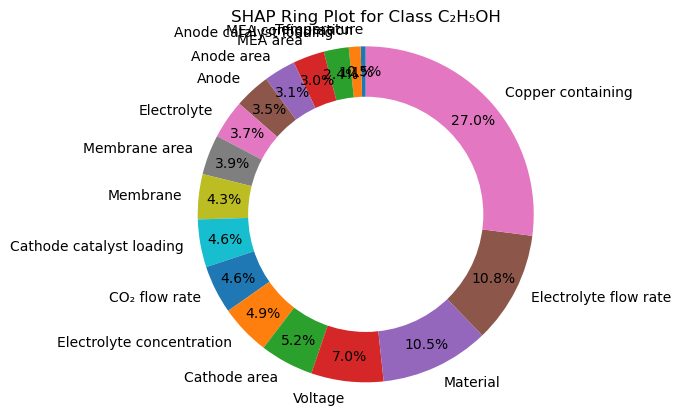

Table of percentage values for Class C₂H₅OH saved as C₂H₅OH.csv


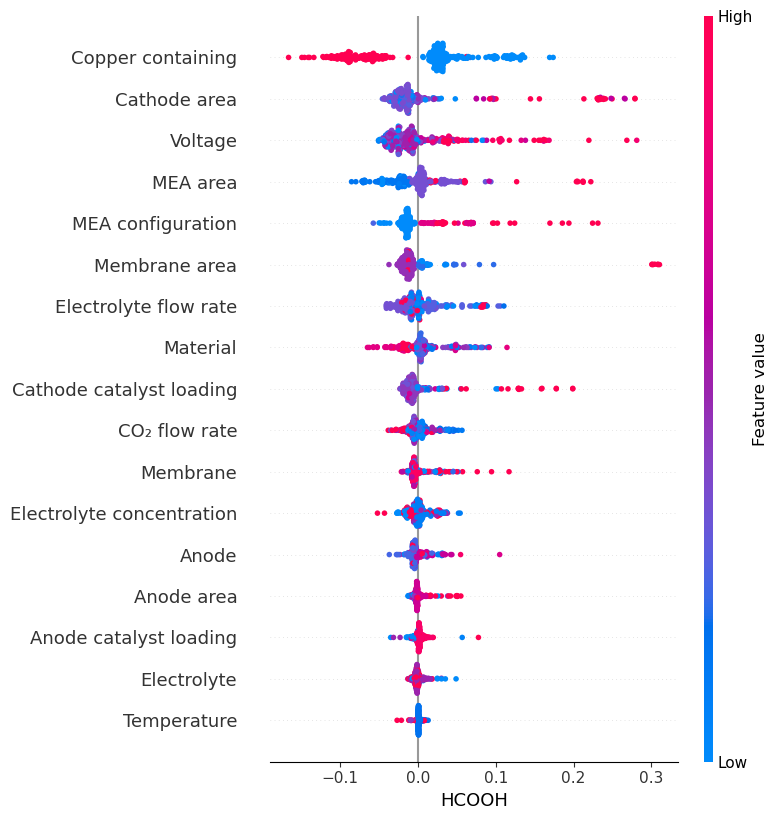

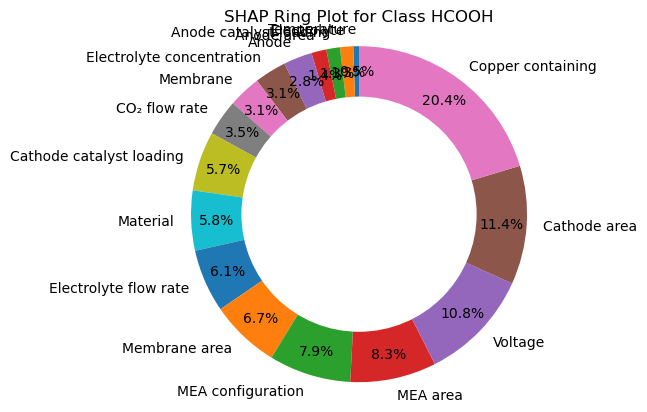

Table of percentage values for Class HCOOH saved as HCOOH.csv


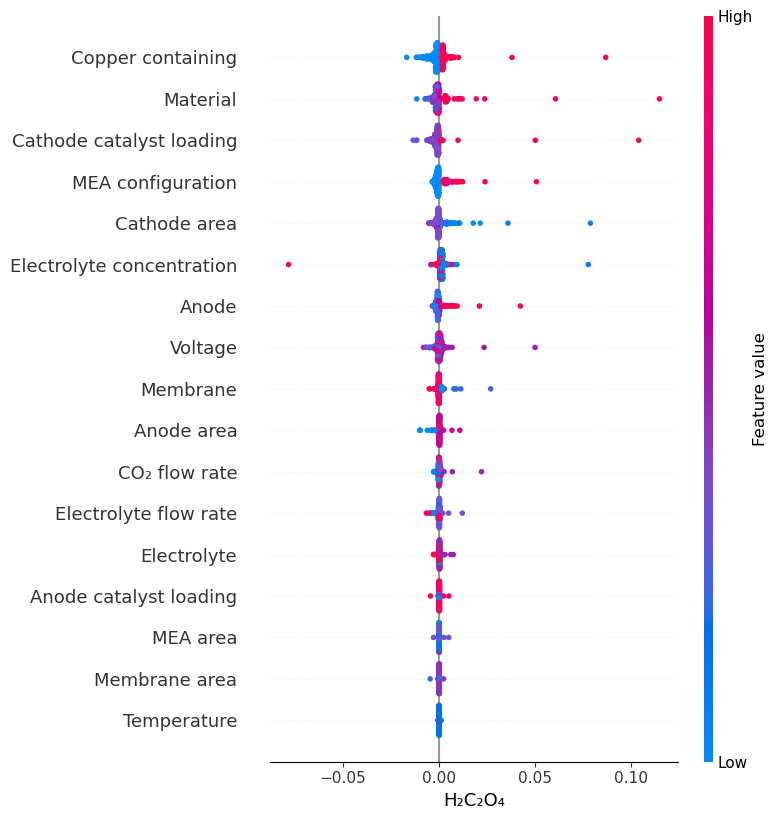

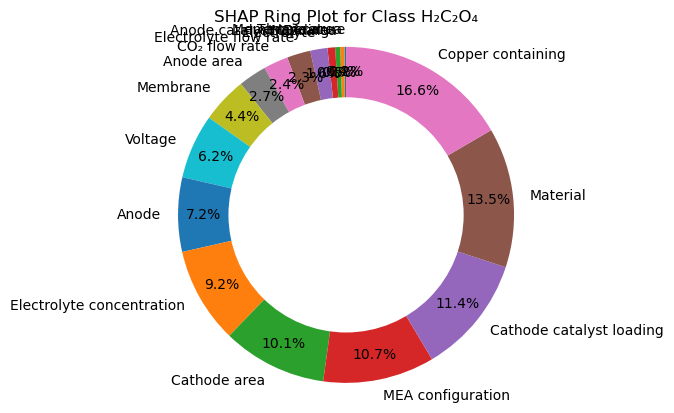

Table of percentage values for Class H₂C₂O₄ saved as H₂C₂O₄.csv


In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import shap

embedding_columns = ['Material']
bool_column = ['Copper containing']

# 定义特征列和目标列
X = df[embedding_columns + bool_column + ['Voltage', 'Electrolyte flow rate','MEA configuration',
                                          'Electrolyte', 'Membrane','Anode','CO₂ flow rate',
                                          'MEA area', 'Membrane area', 'Anode area',
                                          'Anode catalyst loading', 'Cathode area',
                                          'Cathode catalyst loading', 'Temperature', 'Electrolyte concentration']]
y = df['first_product']

# 对目标列进行编码
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# 获取编码后的数字和原始元素的对应关系
encoded_to_original = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# 打印对应关系
for encoded_value, original_value in encoded_to_original.items():
    print(f"编码值: {encoded_value} 对应原始值: {original_value}")
# 划分训练集和测试集
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y_encoded, train_size=0.75, test_size=0.25, random_state=42)
# K 折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_trainval):
    X_train, X_test_fold = X_trainval.iloc[train_index], X_trainval.iloc[test_index]
    y_train, y_test_fold = y_trainval[train_index], y_trainval[test_index]

    # 创建随机森林分类器
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # 在训练集上进行训练
    rf_classifier.fit(X_train, y_train)

    # 在测试集上进行预测
    y_pred_fold = rf_classifier.predict(X_test_fold)

    # 计算评估指标
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    precision = precision_score(y_test_fold, y_pred_fold, average='weighted',zero_division=1)
    recall = recall_score(y_test_fold, y_pred_fold, average='weighted',zero_division=1)
    f1 = f1_score(y_test_fold, y_pred_fold, average='weighted',zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# 打印平均评估指标
print(f"Average Accuracy on KFold: {np.mean(accuracies)}")
print(f"Average Precision on KFold: {np.mean(precisions)}")
print(f"Average Recall on KFold: {np.mean(recalls)}")
print(f"Average F1 Score on KFold: {np.mean(f1_scores)}")

# 在测试集上评估并绘制混淆矩阵
y_pred_test = rf_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion matrix with semantic information')
plt.xlabel('Predicted')
# 设置y轴标签水平显示
plt.yticks(rotation=0)
plt.ylabel('Actual')
plt.show()
shap_feat = X.values
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(shap_feat, y_encoded)
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(shap_feat)


list_of_2d_arrays = [shap_values[:, :, i] for i in range(8)]
plt.figure()
shap.summary_plot(list_of_2d_arrays, shap_feat, feature_names=X.columns, class_names=label_encoder.classes_,show=False)
plt.xlabel('SHAP value')
plt.savefig('J列总体SHAP.jpg',dpi=1000)
plt.show()
# 绘制每个类别的SHAP dot plot并保存为png
for i in range(8):
    plt.figure()
    shap.summary_plot(shap_values[:, :, i], X, plot_type="dot", show=False)
    # 根据编码值获取对应的原始类别名称来设置xlabel
    category_name = encoded_to_original[i]
    plt.xlabel(category_name)
    plt.savefig(f'J列shap{i}.jpg',dpi=1000)
    plt.show()
# 绘制特征重要性环形图
    def plot_shap_ring_for_class(shap_values_class, feature_names):
        avg_shap_values = np.abs(shap_values_class).mean(axis=0)
        sorted_idx = np.argsort(avg_shap_values)
        sorted_feature_names = [feature_names[j] for j in sorted_idx]
        sorted_avg_shap_values = avg_shap_values[sorted_idx]
        fig, ax = plt.subplots()
        # 计算总比例
        total = np.sum(sorted_avg_shap_values)
        wedges, texts, autotexts = ax.pie(sorted_avg_shap_values, labels=sorted_feature_names, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        fig.gca().add_artist(centre_circle)
        ax.axis('equal')
        plt.title(f'SHAP Ring Plot for Class {category_name}')
        #plt.savefig(f'Jshap_ring_{i}.jpg', dpi=1000)
        plt.show()
        # 输出元素所代表的百分比数值为表格形式
        percentages = [(name, value / total * 100) for name, value in zip(sorted_feature_names, sorted_avg_shap_values)]
        df = pd.DataFrame(percentages, columns=['Feature', 'Percentage'])
        df.to_csv(f'J{category_name}.csv', index=False)
        print(f"Table of percentage values for Class {category_name} saved as {category_name}.csv")
    
    # 调用绘制特征重要性环形图的函数
    plot_shap_ring_for_class(shap_values[:, :, i], X.columns)

In [5]:
# Q列

In [6]:
# 处理total_current_density列成为分类变量
def categorize_current(current):
    if 0 < current <= 100:
        return 'Category_1'
    elif 100 < current <= 180:
        return 'Category_2'
    elif 180 < current <= 1000:
        return 'Category_3'    
df['tcd_category'] = df['total_current_density'].apply(categorize_current)
print(df['tcd_category'])

0      Category_2
1      Category_1
2      Category_3
3      Category_3
4      Category_1
          ...    
368    Category_2
369    Category_2
370    Category_3
371    Category_3
372    Category_3
Name: tcd_category, Length: 373, dtype: object


编码值: 0 对应原始值: Category_1
编码值: 1 对应原始值: Category_2
编码值: 2 对应原始值: Category_3
Average Accuracy on KFold: 0.6848051948051948
Average Precision on KFold: 0.7039113248430585
Average Recall on KFold: 0.6848051948051948
Average F1 Score on KFold: 0.6848679489989185


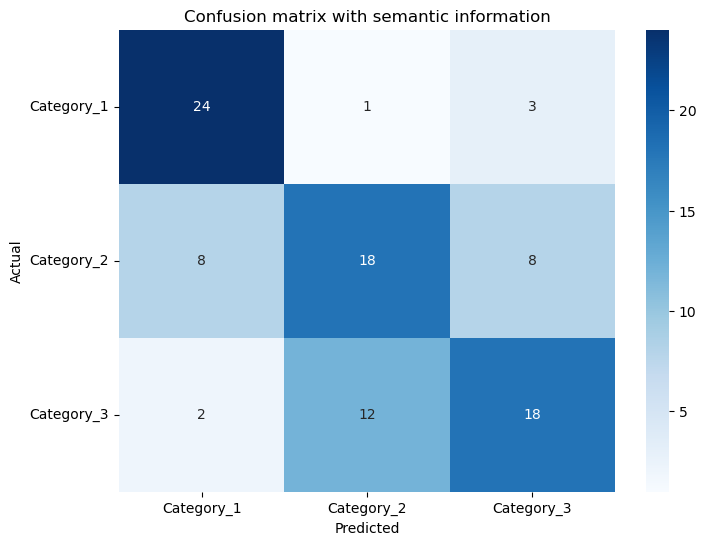

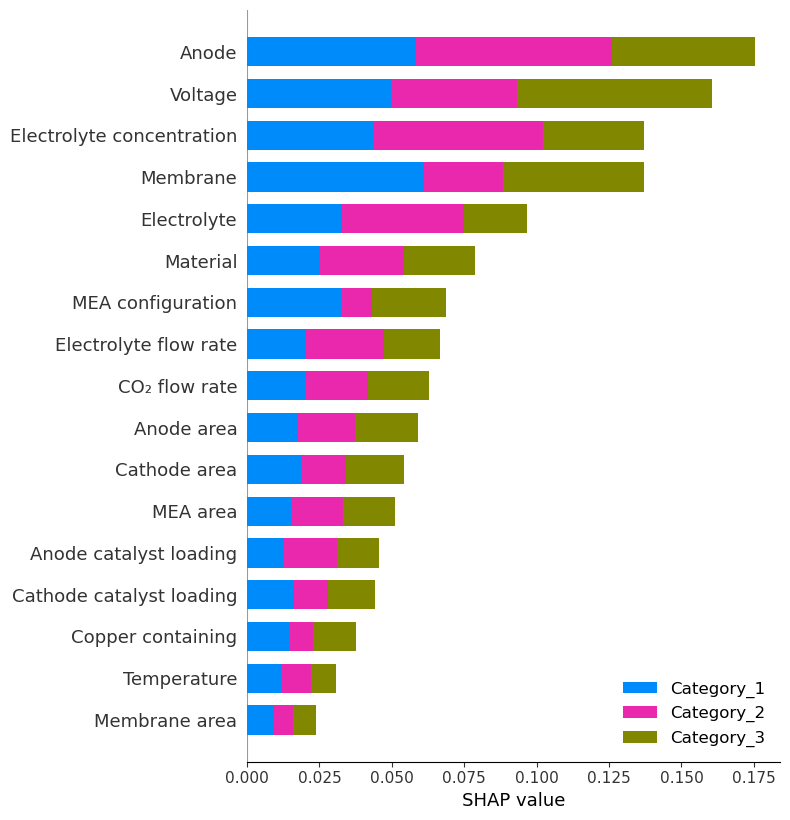

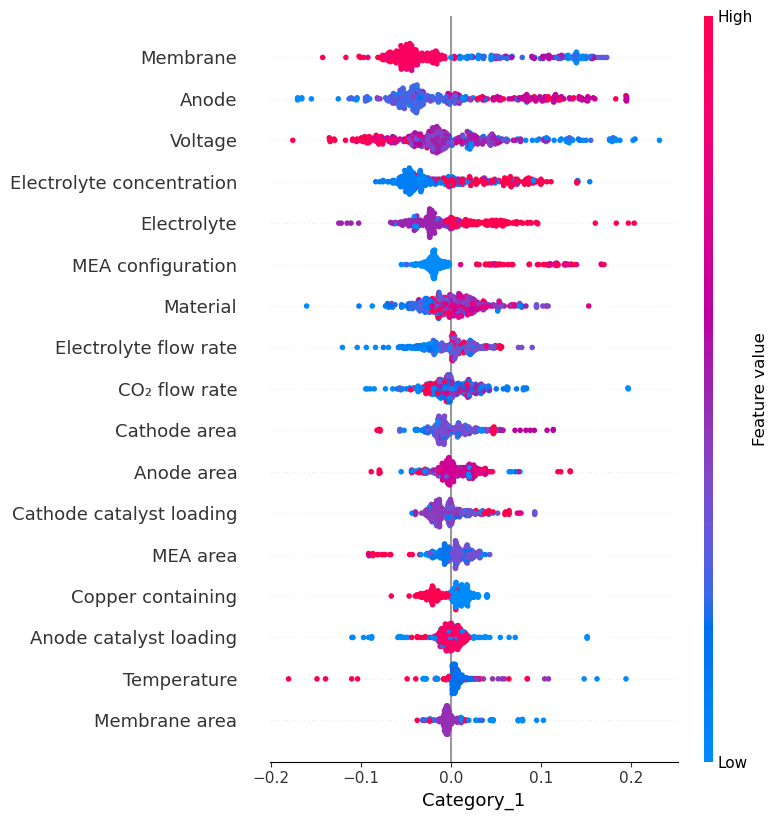

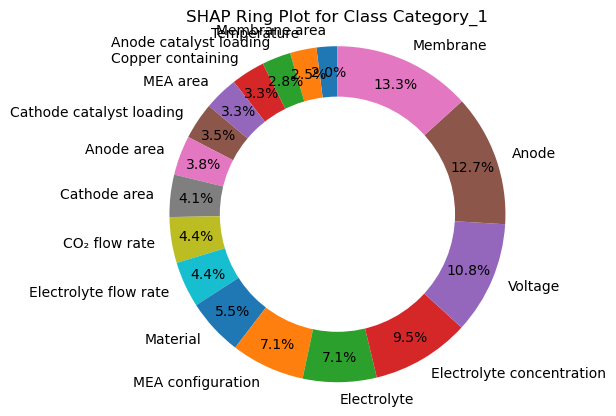

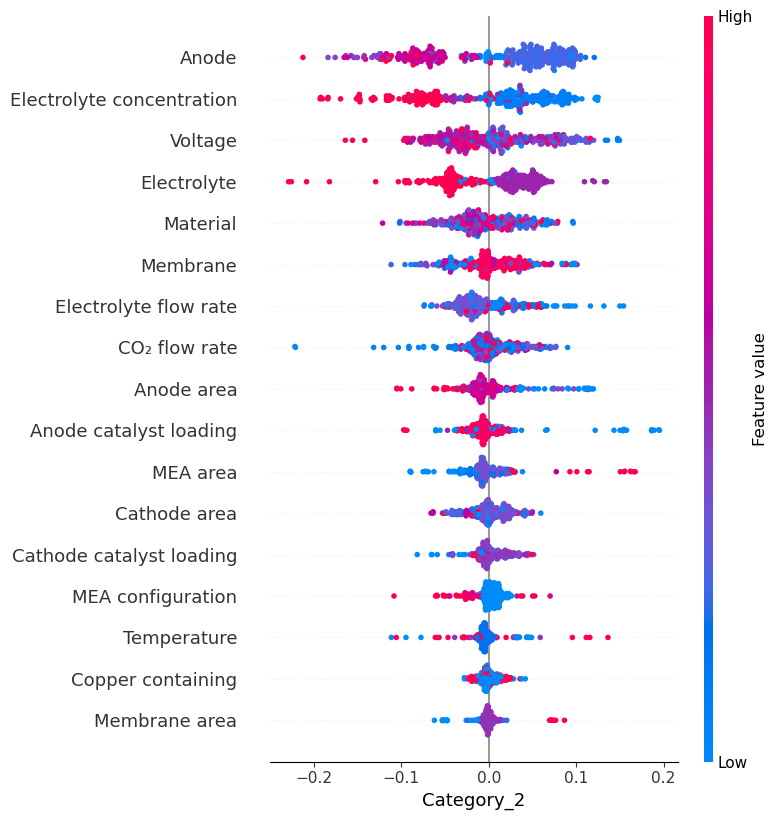

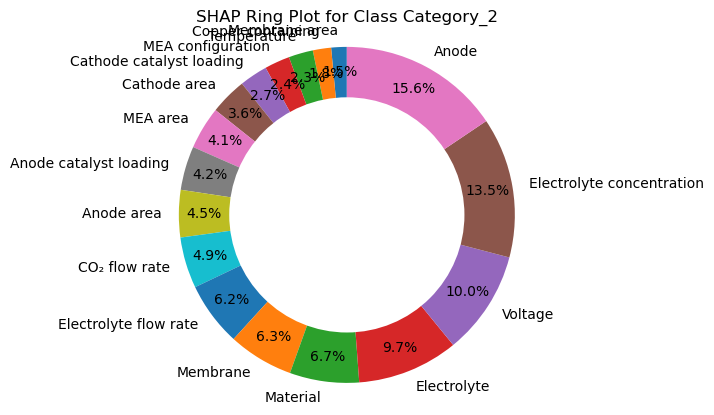

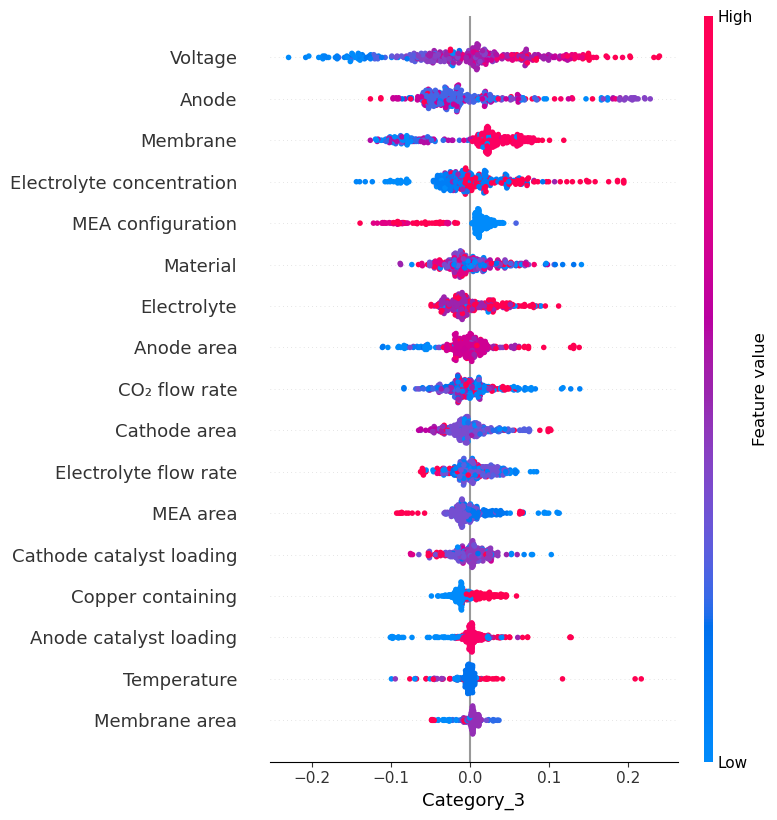

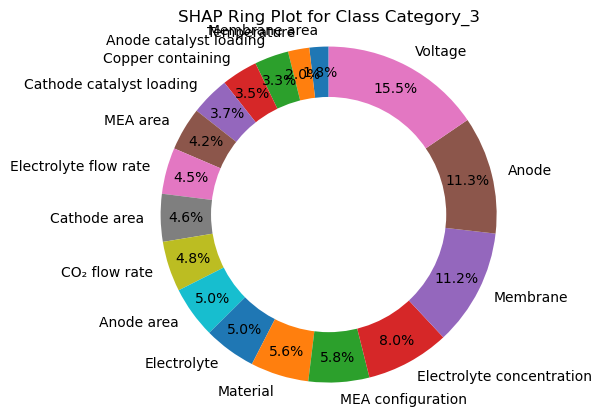

In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import shap

embedding_columns = ['Material']
bool_column = ['Copper containing']

# 定义特征列和目标列
X = df[embedding_columns + bool_column   + ['Voltage', 'Electrolyte flow rate','MEA configuration',
                                          'Electrolyte', 'Membrane','Anode','CO₂ flow rate',
                                                               'MEA area', 'Membrane area', 'Anode area',
                                                               'Anode catalyst loading', 'Cathode area',
                                                               'Cathode catalyst loading', 'Temperature', 'Electrolyte concentration']]
y = df['tcd_category']

# 对目标列进行编码
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# 获取编码后的数字和原始元素的对应关系
encoded_to_original = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# 打印对应关系
for encoded_value, original_value in encoded_to_original.items():
    print(f"编码值: {encoded_value} 对应原始值: {original_value}")
# 划分训练集和测试集
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y_encoded, train_size=0.75, test_size=0.25, random_state=42)
# K 折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
precisions = []
recalls = []
f1_scores = []

for train_index, test_index in kf.split(X_trainval):
    X_train, X_test_fold = X_trainval.iloc[train_index], X_trainval.iloc[test_index]
    y_train, y_test_fold = y_trainval[train_index], y_trainval[test_index]

    # 创建随机森林分类器
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # 在训练集上进行训练
    rf_classifier.fit(X_train, y_train)

    # 在测试集上进行预测
    y_pred_fold = rf_classifier.predict(X_test_fold)

    # 计算评估指标
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    precision = precision_score(y_test_fold, y_pred_fold, average='weighted',zero_division=1)
    recall = recall_score(y_test_fold, y_pred_fold, average='weighted',zero_division=1)
    f1 = f1_score(y_test_fold, y_pred_fold, average='weighted',zero_division=1)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# 打印平均评估指标
print(f"Average Accuracy on KFold: {np.mean(accuracies)}")
print(f"Average Precision on KFold: {np.mean(precisions)}")
print(f"Average Recall on KFold: {np.mean(recalls)}")
print(f"Average F1 Score on KFold: {np.mean(f1_scores)}")

# 在测试集上评估并绘制混淆矩阵
y_pred_test = rf_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion matrix with semantic information')
# 设置y轴标签水平显示
plt.yticks(rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
#plt.savefig('QCMyuyi.jpg', dpi=1000,bbox_inches = 'tight')
plt.show()

shap_feat = X.values
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(shap_feat, y_encoded)
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(shap_feat)

list_of_2d_arrays = [shap_values[:, :, i] for i in range(3)]
# 绘制SHAP summary plot并保存为jpg
plt.figure()
shap.summary_plot(list_of_2d_arrays, shap_feat, feature_names=X.columns, class_names=label_encoder.classes_, show=False)
plt.xlabel('SHAP value')
plt.savefig('Q列总体SHAP.jpg', dpi=1000)
plt.show()

# 绘制每个类别的SHAP dot plot并保存为png
for i in range(3):
    plt.figure()
    shap.summary_plot(shap_values[:, :, i], X, plot_type="dot", show=False)
    # 根据编码值获取对应的原始类别名称来设置xlabel
    category_name = encoded_to_original[i]
    plt.xlabel(category_name)
    plt.savefig(f'Qshap{i}.jpg', dpi=1000)
    plt.show()
# 新增：绘制特征重要性环形图
    def plot_shap_ring_for_class(shap_values_class, feature_names):
        avg_shap_values = np.abs(shap_values_class).mean(axis=0)
        sorted_idx = np.argsort(avg_shap_values)
        sorted_feature_names = [feature_names[j] for j in sorted_idx]
        sorted_avg_shap_values = avg_shap_values[sorted_idx]
        fig, ax = plt.subplots()
        # 计算总比例
        total = np.sum(sorted_avg_shap_values)
        wedges, texts, autotexts = ax.pie(sorted_avg_shap_values, labels=sorted_feature_names, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        fig.gca().add_artist(centre_circle)
        ax.axis('equal')
        plt.title(f'SHAP Ring Plot for Class {category_name}')
        #plt.savefig(f'Jshap_ring_{i}.jpg', dpi=1000)
        plt.show()
        # 输出元素所代表的百分比数值为表格形式
        percentages = [(name, value / total * 100) for name, value in zip(sorted_feature_names, sorted_avg_shap_values)]
        df = pd.DataFrame(percentages, columns=['Feature', 'Percentage'])
        df.to_csv(f'Q{category_name}.csv', index=False)
    
    # 调用绘制特征重要性环形图的函数
    plot_shap_ring_for_class(shap_values[:, :, i], X.columns)

In [8]:
# K

In [9]:
df.rename(columns={'first_product_faraday_efficiency': 'First product faraday efficiency'}, inplace=True)
df['First product faraday efficiency'] = df['First product faraday efficiency'] / 100
print(df['First product faraday efficiency'])

0      0.9300
1      0.9100
2      0.3400
3      0.9330
4      0.8200
        ...  
368    0.4482
369    0.9220
370    0.9864
371    0.9000
372    0.4390
Name: First product faraday efficiency, Length: 373, dtype: float64


Random Forest - Average Mean Squared Error: 0.026129074699390454
Random Forest - Average Coefficient of determination: 0.5671335390191871


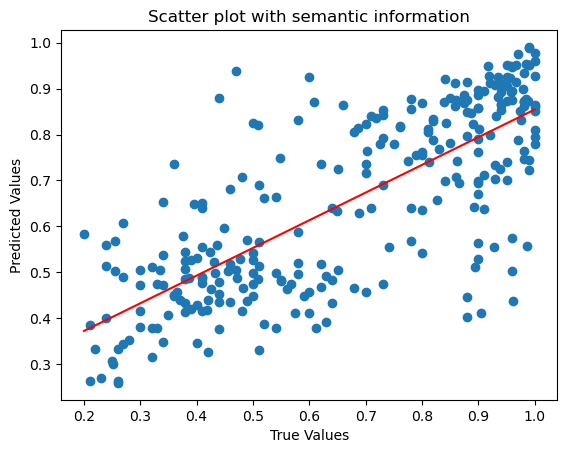

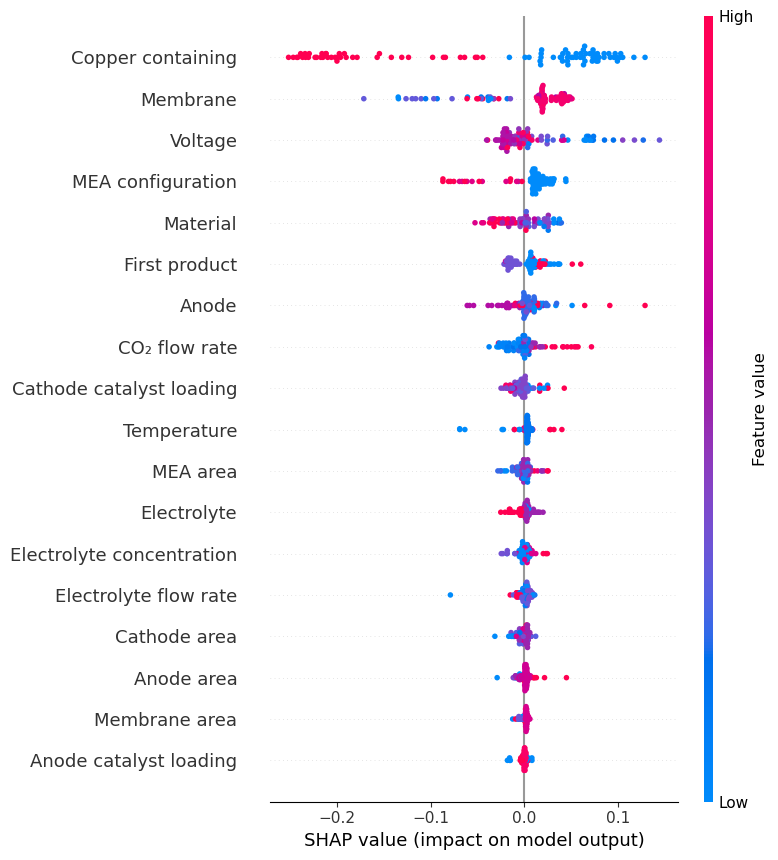

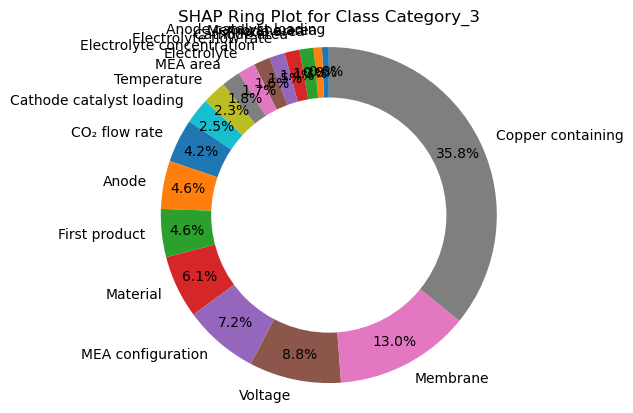

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

embedding_columns = ['Material']
bool_column = ['Copper containing']

# 定义特征列和目标列
X = df[embedding_columns + bool_column + ['Voltage', 'Electrolyte flow rate', 'MEA configuration',
                                          'Electrolyte', 'Membrane', 'Anode', 'CO₂ flow rate',
                                          'MEA area', 'Membrane area', 'Anode area',
                                          'Anode catalyst loading', 'Cathode area',
                                          'Cathode catalyst loading', 'Temperature', 'Electrolyte concentration', 'First product']]
y = df['First product faraday efficiency']

# 划分训练集和测试集
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

# 初始化K折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 用于存储随机森林模型的评估指标结果
rf_mse_scores = []
rf_r2_scores = []
all_true_values = []
all_predicted_values = []

# 随机森林回归模型
rf_model = RandomForestRegressor(random_state=42)

for train_index, val_index in kf.split(X_trainval):
    X_train, X_val = X_trainval.iloc[train_index], X_trainval.iloc[val_index]
    y_train, y_val = y_trainval.iloc[train_index], y_trainval.iloc[val_index]
    rf_model.fit(X_train, y_train)
    y_val_pred = rf_model.predict(X_val)
    rf_mse_scores.append(mean_squared_error(y_val, y_val_pred))
    rf_r2_scores.append(r2_score(y_val, y_val_pred))
    all_true_values.extend(y_val)
    all_predicted_values.extend(y_val_pred)

# 计算平均均方误差和平均决定系数
average_mse = np.mean(rf_mse_scores)
average_r2 = np.mean(rf_r2_scores)

print(f"Random Forest - Average Mean Squared Error: {average_mse}")
print(f"Random Forest - Average Coefficient of determination: {average_r2}")

# 拟合直线（使用最小二乘法）
# 将列表转换为numpy数组，便于后续计算
all_true_values = np.array(all_true_values).reshape(-1, 1)
all_predicted_values = np.array(all_predicted_values).reshape(-1, 1)

# 创建线性回归对象并拟合数据
reg = linear_model.LinearRegression()
reg.fit(all_true_values, all_predicted_values)

# 得到拟合直线的斜率和截距
slope = reg.coef_[0][0]
intercept = reg.intercept_[0]

# 绘制散点图
plt.scatter(all_true_values, all_predicted_values)

# 绘制拟合直线
x_vals = np.array([min(all_true_values), max(all_true_values)])
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter plot with semantic information')

plt.show()
# 在整个训练集上重新训练最终模型
final_rf_model = RandomForestRegressor(random_state=42)
final_rf_model.fit(X_trainval, y_trainval)

# 创建一个SHAP解释器对象
explainer = shap.TreeExplainer(final_rf_model)
# 计算SHAP值
shap_values = explainer.shap_values(X_test)
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="dot", show=False)
plt.savefig('K列SHAP.jpg', dpi=1000)
plt.show()
# 新增：绘制特征重要性环形图
def plot_shap_ring_for_class(shap_values_class, feature_names):
    avg_shap_values = np.abs(shap_values_class).mean(axis=0)
    sorted_idx = np.argsort(avg_shap_values)
    sorted_feature_names = [feature_names[j] for j in sorted_idx]
    sorted_avg_shap_values = avg_shap_values[sorted_idx]
    fig, ax = plt.subplots()
    # 计算总比例
    total = np.sum(sorted_avg_shap_values)
    wedges, texts, autotexts = ax.pie(sorted_avg_shap_values, labels=sorted_feature_names, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)
    ax.axis('equal')
    plt.title(f'SHAP Ring Plot for Class {category_name}')
        #plt.savefig(f'Jshap_ring_{i}.jpg', dpi=1000)
    plt.show()
        # 输出元素所代表的百分比数值为表格形式
    percentages = [(name, value / total * 100) for name, value in zip(sorted_feature_names, sorted_avg_shap_values)]
    df = pd.DataFrame(percentages, columns=['Feature', 'Percentage'])
    df.to_csv(f'Khuanxing.csv', index=False)
    
    # 调用绘制特征重要性环形图的函数
plot_shap_ring_for_class(shap_values, X.columns)